# Prosper Loan Analysis
## by Taiwo Ajagunsegun

## Introduction

>Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.


## Preliminary Wrangling

In [1]:
# import all packages and set plots style and inline embedding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Structure of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,10/11/2001 0:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2/27/2014 8:28,680.0,699.0,3/18/1996 0:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,7/27/2002 0:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,10/22/2012 11:02,800.0,819.0,2/28/1983 0:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,9/14/2013 18:38,680.0,699.0,2/20/2004 0:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A18036930218888920068

In [4]:
# Shape of the dataset
df.shape

(113937, 81)

In [5]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset contains reasonable number of missing values.

In [6]:
# Descriptive statistics for numeric-type variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

> A quick glance through the descriptive statistics shown above indicates that the CurrentCreditLines, OpenCreditLines, EmploymentStatusDuration, TotalCreditLinesPast7years, OpenRevolvingAccount columns and a couple of other columns contain some extreme values known as outliers. Further analyses might justify the importance of these columns and their respective values.

### What is the structure of your dataset?

> The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, from the year 2009-2014. There are two main categories:
><ul><li>Borrower information: Basic information of the borrowers such as annual income, employment status, interest rate, loan status, etc.</li>
><li>Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc. There were some elements that need to be fixed, in order to create interesting and trustworthy analyses and visualizations.</li></ul>


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in analyzing the basic information of borrowers and how such information affects/influence their Prosper Score.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I intend to explore the EmploymentStatus, IncomeRange and other features I feel would have the most effect on the Prosper Score variable.

## Univariate Exploration

> I would start by displaying the distribution of the ProsperScore column.

In [7]:
# Define a function to label the plots
def label(xlabel, ylabel, title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [8]:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

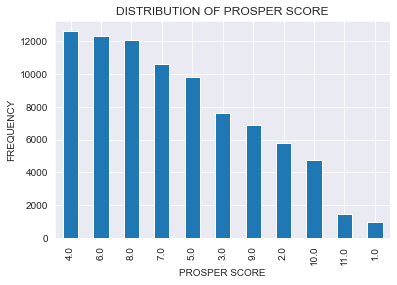

In [9]:
df['ProsperScore'].value_counts().plot(kind = 'bar')
label('PROSPER SCORE', 'FREQUENCY', 'DISTRIBUTION OF PROSPER SCORE')

> From the above plot, it can be observed that the Prosper score ranges from ```1``` to ```11``` although the content of variable description file provided alongside the dataset suggested that the score ranges between ```1``` and ```10```. The score of ```4.0``` had the highest frequency while ```1.0``` had the lowest frquency.

Let's find out about the distribution of the Income of borrowers.

In [10]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

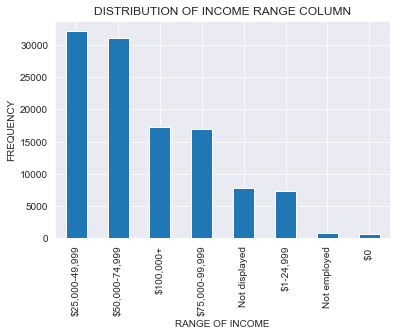

In [11]:
df['IncomeRange'].value_counts().plot(kind = 'bar')
label('RANGE OF INCOME', 'FREQUENCY', 'DISTRIBUTION OF INCOME RANGE COLUMN')

>The above plot shows that there are more borrowers with income range between ```$25,000``` and ```$74,999```. It is worthy to note that unemployed people and people with zero income are less likely to borrow loans since the number of these two groups are not much in the dataset.

Let's find out about the distribution of the employment status of the borrowers.

In [12]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

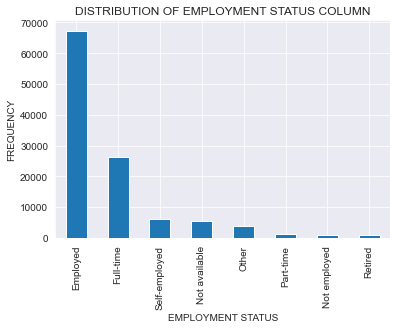

In [13]:
df['EmploymentStatus'].value_counts().plot(kind = 'bar')
label('EMPLOYMENT STATUS', 'FREQUENCY', 'DISTRIBUTION OF EMPLOYMENT STATUS COLUMN')

>The above plot shows that there are more borrowers who are employed and in full-time role in the dataset. Part-time workers, unemployed people, and retirees make up insignificant number in the population.

Let's investigate the distribution of the Number of Prosper loans the borrowers created at the time.

In [14]:
df['TotalProsperLoans'].unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  8.,  7.,  0.])

In [15]:
df['TotalProsperLoans'].value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: TotalProsperLoans, dtype: int64

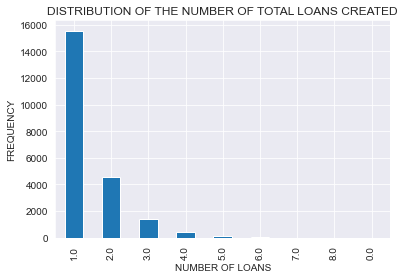

In [16]:
df['TotalProsperLoans'].value_counts().plot(kind = 'bar')
label('NUMBER OF LOANS', 'FREQUENCY', 'DISTRIBUTION OF THE NUMBER OF TOTAL LOANS CREATED')

>The above plot shows that there are more borrowers with a single prior loan application.

Let's find out about the distribution of the occupation of borrowers.

In [17]:
df['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

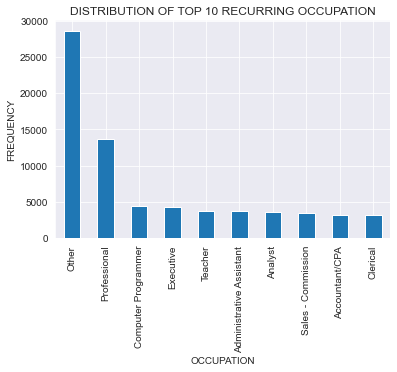

In [18]:
df['Occupation'].value_counts().head(10).plot(kind = 'bar')
label('OCCUPATION', 'FREQUENCY', 'DISTRIBUTION OF TOP 10 RECURRING OCCUPATION')

> The above plot shows the top 10 most recurring occupations of borrowers in the dataset. The borrowers are people with diverse occupations ranging from Professionals to Skilled Labor, Executives, Sales representatives, Laborers, Firemen, Construction workers, Computer Programmers and a bunch of several other vocations. Nevertheless, majority of the borrowers did not specify their occupations which made up the value "OTHERS".

Let's find out about the distribution of borrowers classified as home owners.

In [19]:
df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

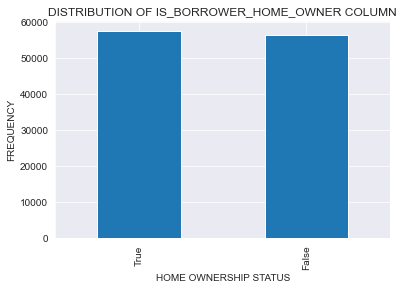

In [20]:
df['IsBorrowerHomeowner'].value_counts().plot(kind = 'bar')
label('HOME OWNERSHIP STATUS', 'FREQUENCY', 'DISTRIBUTION OF IS_BORROWER_HOME_OWNER COLUMN')

>The above plot shows that the number of borrowers classified as home owners are slightly above the borrowers that do not own homes.

Let's find out about the distribution of the loan status column.

In [21]:
df['LoanStatus'].value_counts(normalize = True)

Current                   0.496555
Completed                 0.334167
Chargedoff                0.105251
Defaulted                 0.044042
Past Due (1-15 days)      0.007074
Past Due (31-60 days)     0.003186
Past Due (61-90 days)     0.002747
Past Due (91-120 days)    0.002668
Past Due (16-30 days)     0.002326
FinalPaymentInProgress    0.001799
Past Due (>120 days)      0.000140
Cancelled                 0.000044
Name: LoanStatus, dtype: float64

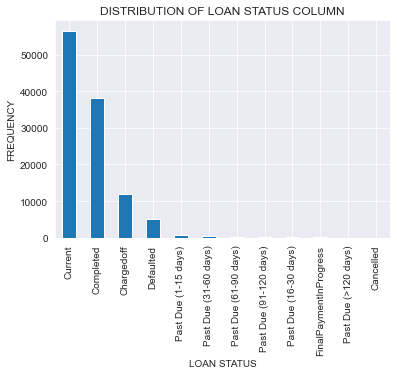

In [22]:
df['LoanStatus'].value_counts().plot(kind = 'bar')
label('LOAN STATUS', 'FREQUENCY', 'DISTRIBUTION OF LOAN STATUS COLUMN')

>There are a significant number of outstanding loans yet to be cleared. Moreover, ```33.4%``` of loans have been completed and an insignificant number of loans are past due as seen in the plot.

Let's find out about the distribution of the interest rate for the Prosper loans.

In [23]:
# Apply the Python Sorted function to display the unique values in sorted order
rate = list(df['BorrowerRate'].unique())
print(sorted(rate))

[0.0, 0.0001, 0.0005, 0.0021, 0.005, 0.0099, 0.01, 0.0115, 0.015, 0.0295, 0.03, 0.0345, 0.035, 0.0395, 0.04, 0.0423, 0.0425, 0.0435, 0.044, 0.045, 0.048, 0.0481, 0.0489, 0.049, 0.0495, 0.0498, 0.0499, 0.05, 0.0509, 0.051, 0.0515, 0.0519, 0.052, 0.053, 0.054, 0.0544, 0.0545, 0.055, 0.0554, 0.0555, 0.0559, 0.056, 0.0564, 0.0565, 0.0569, 0.057, 0.0571, 0.0572, 0.0573, 0.0574, 0.0575, 0.0576, 0.0577, 0.058, 0.0581, 0.0584, 0.0585, 0.0586, 0.0587, 0.0589, 0.059, 0.0591, 0.0592, 0.0594, 0.0595, 0.0596, 0.0598, 0.0599, 0.06, 0.0604, 0.0605, 0.0607, 0.0608, 0.0609, 0.061, 0.0612, 0.0613, 0.0614, 0.0615, 0.0619, 0.062, 0.0623, 0.0625, 0.0627, 0.0628, 0.0629, 0.063, 0.0633, 0.0634, 0.0635, 0.0638, 0.0639, 0.06395, 0.064, 0.0643, 0.0644, 0.0645, 0.0649, 0.065, 0.0652, 0.0654, 0.0655, 0.0658, 0.0659, 0.066, 0.0661, 0.0665, 0.0666, 0.0667, 0.0669, 0.067, 0.0674, 0.0675, 0.0679, 0.068, 0.0683, 0.0684, 0.0685, 0.0686, 0.0688, 0.0689, 0.069, 0.0691, 0.0692, 0.0693, 0.0694, 0.0695, 0.0696, 0.0697, 0.06

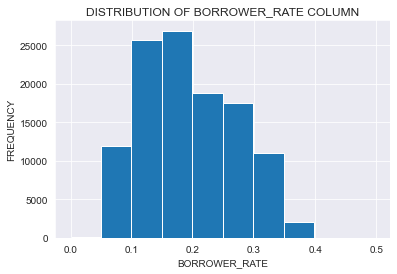

In [24]:
plt.hist(data = df, x = 'BorrowerRate')
label('BORROWER_RATE', 'FREQUENCY', 'DISTRIBUTION OF BORROWER_RATE COLUMN')

>From the above analysis, it can be observed that the interest rate of Prosper loan ranges from ```0%``` to ```49.75%```.

Let's find out about the distribution of the number of investors that funded the loans.

In [25]:
df['Investors'].unique().max()

1189

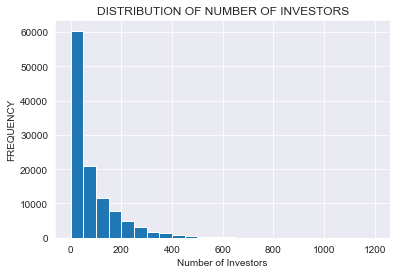

In [26]:
binsize = 50
bins = np.arange(0, df['Investors'].max()+binsize, binsize);
plt.hist(data = df, x = 'Investors', bins = bins);
label('Number of Investors', 'FREQUENCY', 'DISTRIBUTION OF NUMBER OF INVESTORS')

>The distribution of the number of investors that funded a loan is heavily right-skewed with ```1``` having the highest frequency. The number of investors ranges from ```1``` to ```1189``` for a particular loan application.

Let's find out about the distribution of the number of recommendations the borrower had at the time the listing was created.

In [27]:
df['Recommendations'].value_counts()

0     109678
1       3516
2        568
3        108
4         26
5         14
9          6
7          5
6          4
8          3
18         2
16         2
14         1
21         1
24         1
19         1
39         1
Name: Recommendations, dtype: int64

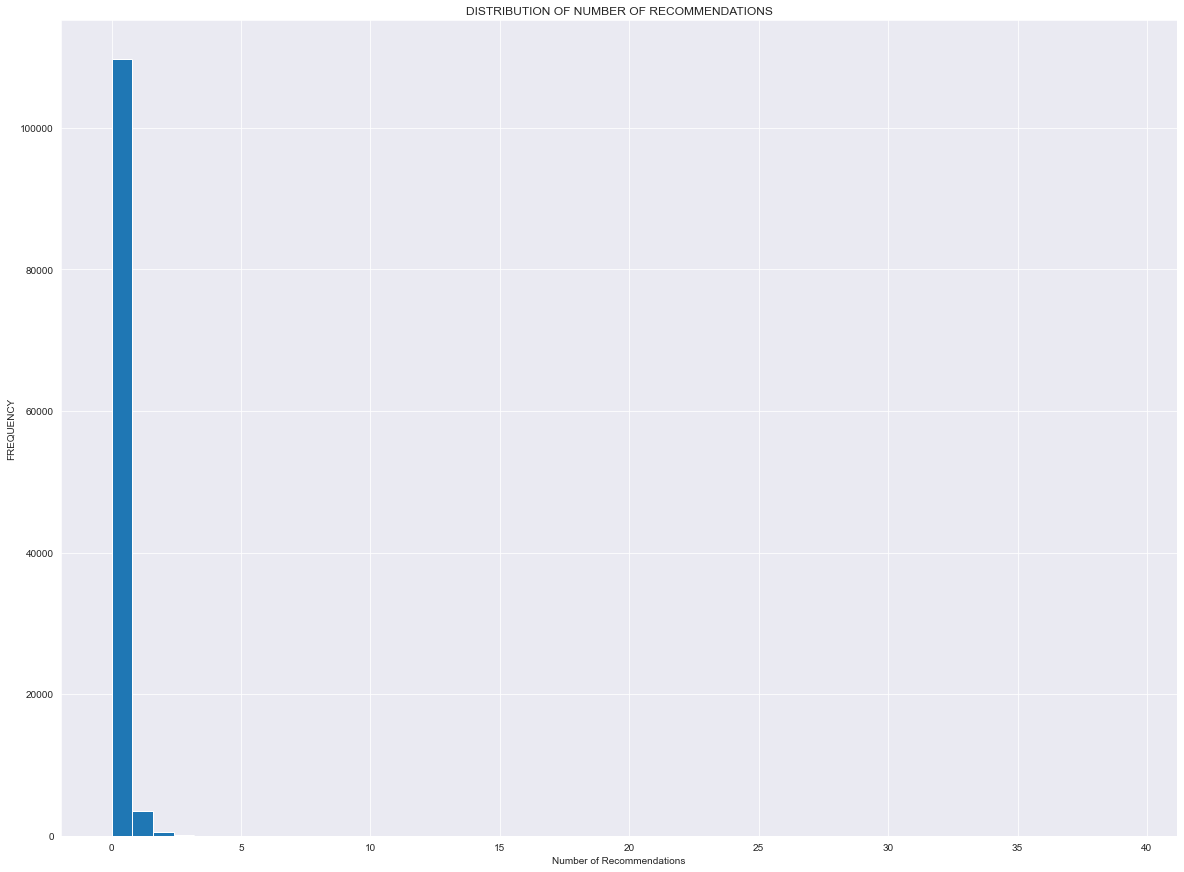

In [28]:
plt.figure(figsize = (20,15))
binsize = 0.8
bins = np.arange(0, df['Recommendations'].max()+binsize, binsize);
plt.hist(data = df, x = 'Recommendations', bins = bins);
label('Number of Recommendations', 'FREQUENCY', 'DISTRIBUTION OF NUMBER OF RECOMMENDATIONS')

>The distribution of the number of recommendations each borrower had at the time their listing was created is heavily right-skewed with ```0``` having the highest frequency. The number of recommendations ranges from ```0``` to ```39``` for a particular borrower.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the Recommendations and Investors columns indicate a heavily right skewed distribution which suggest that there are less number of investors for most of the loan application and most of the borrowers had ```0``` recommendation at the time their listing was created. Also, the distribution of the interest rate seemed slightly normal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was nothing unusual about the distribution of the discrete columns I investigated. Although, some values in some of the discrete variables have relatively high counts. Nonetheless, the values are explanable and do not seem unusual.

## Bivariate Exploration

Let's find out the distribution of the IncomeRange column by the ProsperScore column.

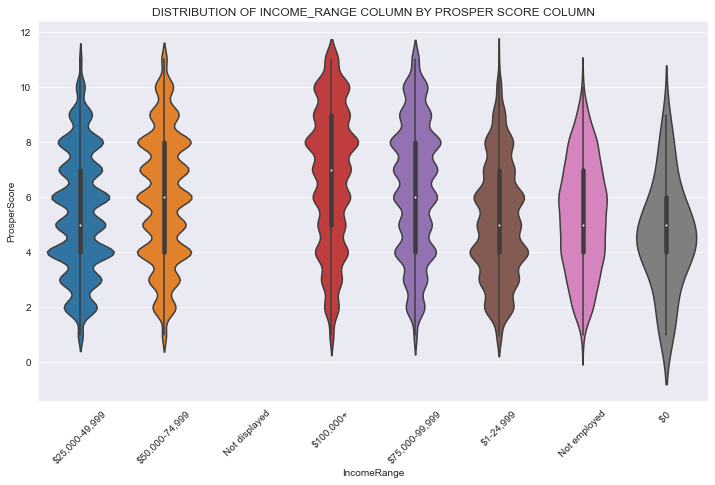

In [29]:
plt.figure(figsize = (12,7))
sns.violinplot(data=df, x = 'IncomeRange', y = 'ProsperScore', inner='box')
plt.xticks(rotation=45);
plt.title('DISTRIBUTION OF INCOME_RANGE COLUMN BY PROSPER SCORE COLUMN');

> From the above plot, we can infer that borrowers with higher income range tend to have higher Prosper score as seen in both ```$100,000+``` curve and ```$75,000 - $99,999``` curve. Also the kernel density estimation curves for all the Income-range groups have multimodal distribution except for the Not employed group and the zero-income borrowers with no skews and just a single peak each which indicate that their distribution is unimodal.

Comparing the distribution of the EmploymentStatus column by the ProsperScore column

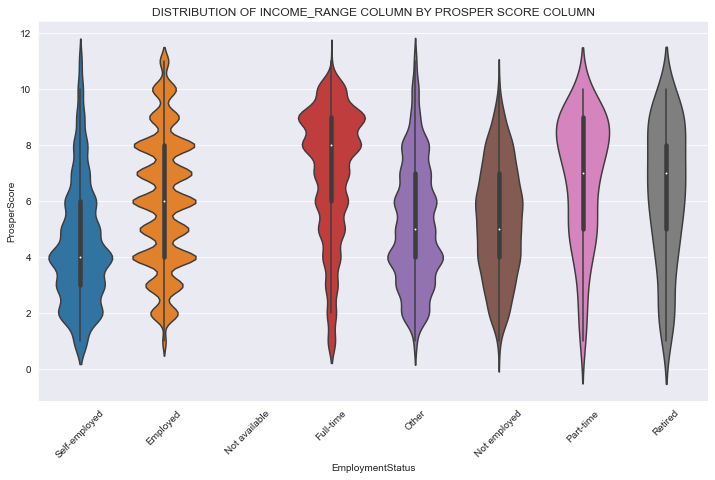

In [30]:
plt.figure(figsize = (12,7))
sns.violinplot(data=df, x = 'EmploymentStatus', y = 'ProsperScore', inner='box')
plt.xticks(rotation=45);
plt.title('DISTRIBUTION OF INCOME_RANGE COLUMN BY PROSPER SCORE COLUMN');

>From the above plot, it is observed that most borrowers with Full-time, and Part-time employment tend to have higher Prosper score. Meanwhile most borrowers that are Self-employed have lower Prosper score.

Comparing the distribution of the LoanStatus column by the ProsperScore column

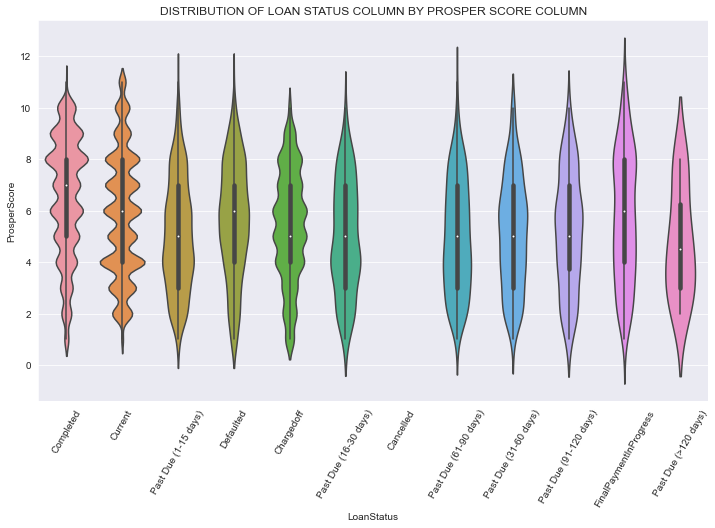

In [31]:
plt.figure(figsize = (12,7))
sns.violinplot(data=df, x = 'LoanStatus', y = 'ProsperScore', inner='box')
plt.xticks(rotation=60);
plt.title('DISTRIBUTION OF LOAN STATUS COLUMN BY PROSPER SCORE COLUMN');

>From the above plot, it is observed that most borrowers with Completed Loan status tend to have higher Prosper score.

Comparing the distribution of the Number of Prosper loans the borrowers created by the ProsperScore column.

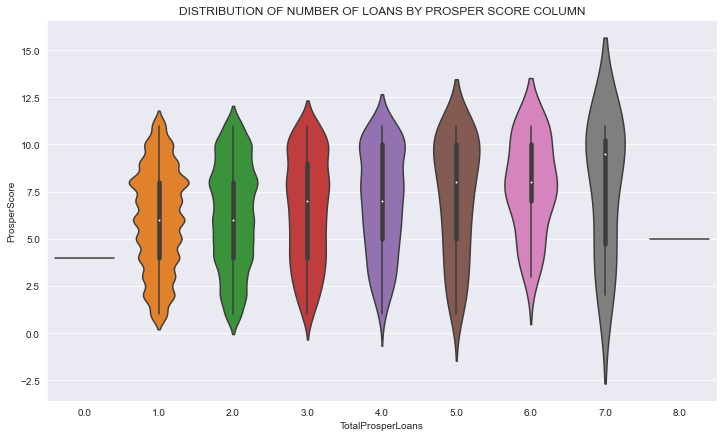

In [32]:
plt.figure(figsize = (12,7))
sns.violinplot(data=df, x = 'TotalProsperLoans', y = 'ProsperScore', inner='box')
plt.title('DISTRIBUTION OF NUMBER OF LOANS BY PROSPER SCORE COLUMN');

>From the above plot, it is observed that most of the borrowers with ```3, 4, 5, and 7``` loan applications had higher Prosper score.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From my exploration, I observed that borrowers with higher income range tend to have relatively higher Prosper score. Also, the Employment status and Loan status greatly influenced the Prosper score.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the interesting findings I discovered is that most of the borrowers with ```3, 4, 5, and 7``` loan applications had higher Prosper score.

## Multivariate Exploration

Let's explore the relationships between the Prosper Score and other numerical columns using Seaborn PairGrid method.

A PAIR PLOT TO ESTABLISH RELATIONSHIPS AMONG NUMERICAL COLUMNS


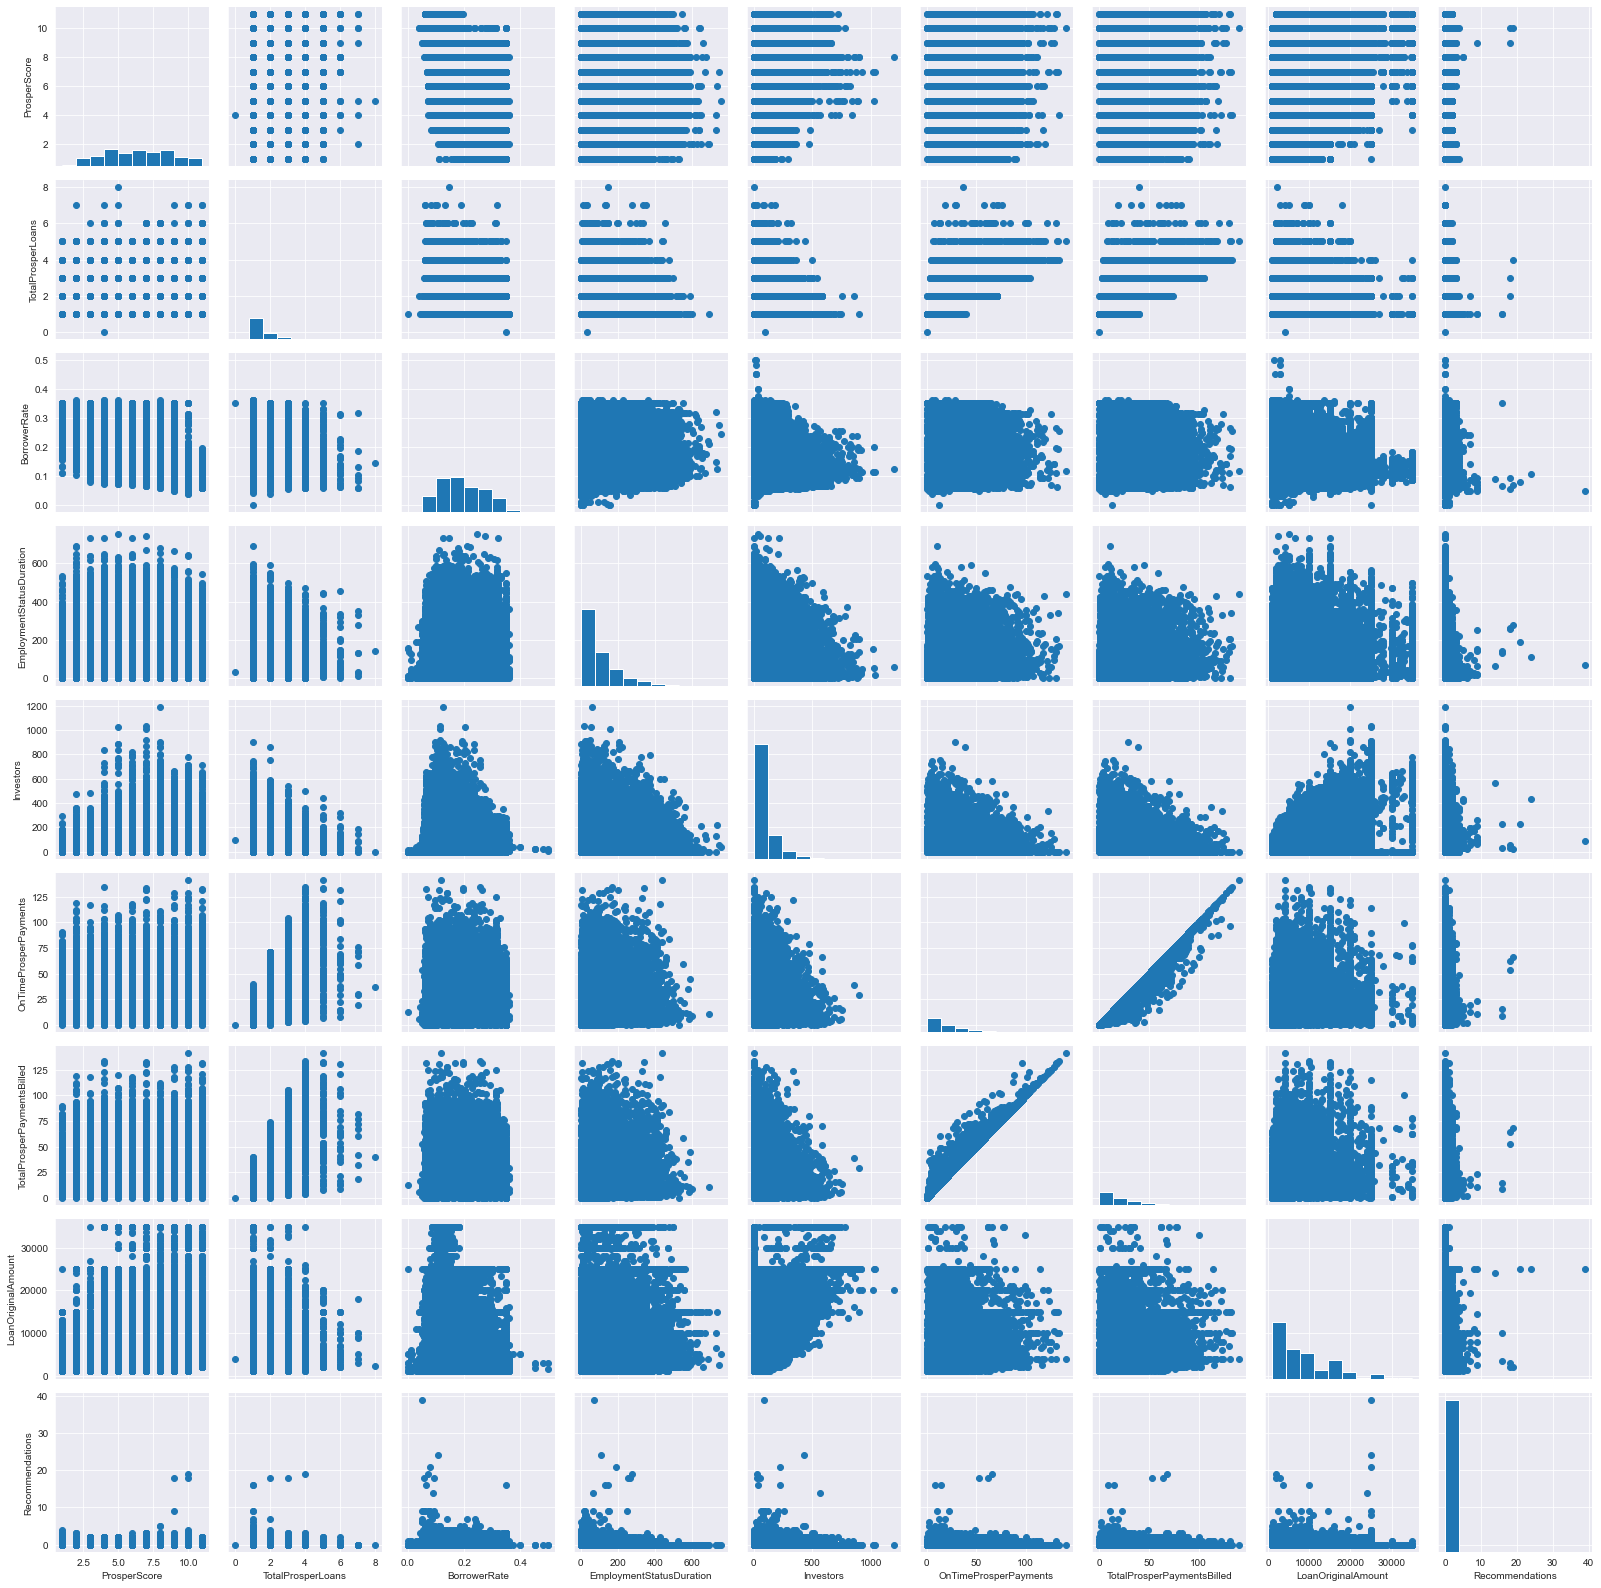

In [33]:
print('A PAIR PLOT TO ESTABLISH RELATIONSHIPS AMONG NUMERICAL COLUMNS')
g = sns.PairGrid(data = df, vars = ['ProsperScore', 'TotalProsperLoans', 'BorrowerRate', 'EmploymentStatusDuration', 'Investors',
                                    'OnTimeProsperPayments', 'TotalProsperPaymentsBilled', 'LoanOriginalAmount', 'Recommendations']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It can be seen from the above plot that none of the explored numerical features correlate with the Prosper score which is my feature of interest.

### Were there any interesting or surprising interactions between features?

> Also from the plot above, there is a strong positive correlation between the OnTimeProsperPayments column and the TotalProsperPaymentBilled column.

## Conclusions
> I explored the distribution of some of the features and the relationships inherent between them and the Prosper Score which is my variable of interest. I observed that borrowers with higher income range tend to have relatively higher Prosper score. Also, the Employment status and Loan status greatly influenced the Prosper score.

> One of the interesting findings I discovered is that most of the borrowers with ```3, 4, 5, and 7``` loan applications had higher Prosper score.